### To dos
- check skew of variables
    - apply transformations as required
- convert categoricals to dummy variables
- deal with nulls/nans (or don't)
- split off dependent/independent variables
- scale/normalise
- split into train/validate


In [28]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

In [29]:
train = pd.read_csv("../data/train.csv")

In [30]:
numeric = [var for var in train.columns if train.dtypes[var] != 'object']
category = [var for var in train.columns if train.dtypes[var] == 'object']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'PoolQC'),
  Text(1, 0, 'MiscFeature'),
  Text(2, 0, 'Alley'),
  Text(3, 0, 'Fence'),
  Text(4, 0, 'FireplaceQu'),
  Text(5, 0, 'LotFrontage'),
  Text(6, 0, 'GarageType'),
  Text(7, 0, 'GarageYrBlt'),
  Text(8, 0, 'GarageFinish'),
  Text(9, 0, 'GarageQual'),
  Text(10, 0, 'GarageCond'),
  Text(11, 0, 'BsmtExposure'),
  Text(12, 0, 'BsmtFinType2'),
  Text(13, 0, 'BsmtFinType1'),
  Text(14, 0, 'BsmtCond'),
  Text(15, 0, 'BsmtQual'),
  Text(16, 0, 'MasVnrArea'),
  Text(17, 0, 'MasVnrType'),
  Text(18, 0, 'Electrical')])

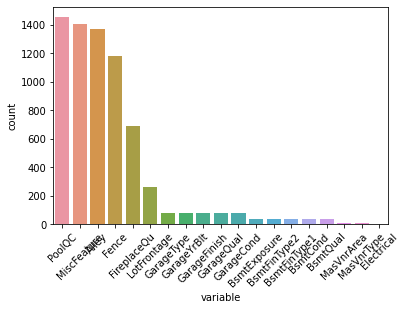

In [110]:
nulls = train.isnull().sum()
nulls = nulls[nulls > 0]
nulls = nulls.reset_index()
nulls.columns = ['variable', 'count']
nulls.sort_values("count", ascending=False, inplace=True)


sns.barplot(x="variable", y='count', data=nulls)
plt.xticks(rotation=45)


In [24]:
train["PoolQC"].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [25]:
for variable in train.columns:
    num_uniq = len(train[variable].unique())
    if num_uniq < 3:
        print(variable)

Street
Utilities
CentralAir


In [26]:
train['CentralAir'].unique()

array(['Y', 'N'], dtype=object)

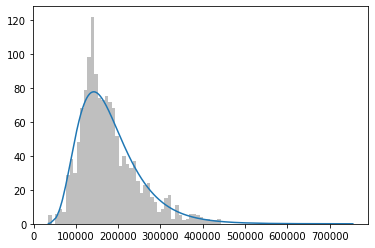

In [27]:

y = train['SalePrice'].sort_values()
# x = np.arange(len(y))
# fig, ax = plt.subplots(1,2)
# plt.figure(1); plt.title('Johnson SU')
# sns.displot(y)

number_of_bins = 50
bin_cutoffs = np.linspace(np.percentile(y,0), np.percentile(y,99),number_of_bins)
h = plt.hist(y, bins = bin_cutoffs, color='0.75')

# Create the plot
# sns.displot(y)
params = st.lognorm.fit(y)
# print(params)

fitted_pdf = st.lognorm.pdf(y, params[0], loc=params[-2], scale=params[-1])
scale_pdf = np.trapz(h[0], h[1][:-1]) / np.trapz(fitted_pdf, y)
fitted_pdf *= scale_pdf
# sns.lineplot(x=y, y=fitted_pdf)
plt.plot(y, fitted_pdf)
# sns.displot(y)
# plt.figure(2); plt.title('Normal')
# sns.distplot(y, kde=False, fit=st.norm)
# plt.figure(3); plt.title('Log Normal')
# sns.distplot(y, kde=False, fit=st.lognorm)